<a href="https://colab.research.google.com/github/akhileshkb/prml-notes/blob/master/180010009_Dimensionality_reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification:
1. K nearest neighbor (K-NN)

Dimensionality Reduction techniques:
1. Principal component analysis (PCA)
2. Linear discriminative analysis (LDA)

# K-NN


Text(0.5, 1.0, 'Data visualization')

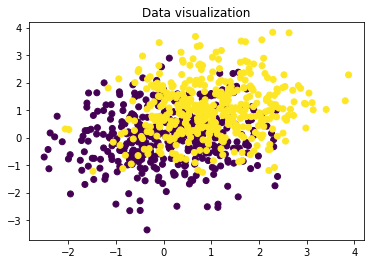

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [2]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [8]:
def get_neighbors(train,label_train, test_row, num_neighbors):
  # insert your code here
  neighbors = []
  for i,l in zip(train,label_train):
    neighbors.append([euclidean_distance(i,test_row),l])
  neighbors.sort()
  neighbors = neighbors[:num_neighbors]
  return neighbors

In [5]:
def predict_classification(neighbors):
  # insert your code here
  labels = np.array(neighbors)[:,1]
  uniq_label, counts = np.unique(labels, return_counts=True)    
  return int(uniq_label[counts.argmax()])

In [6]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [10]:
K=2

pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label, data_test[i,:], K)
  pred_label[i]=predict_classification(neig)

accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')

Testing Accuracy= 65.5 %


# Principal component analysis (PCA)
1. Generate 2D data of 1000 points
2. 

Text(0.5, 1.0, 'distribution in y direction')

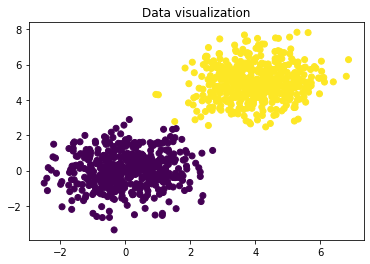

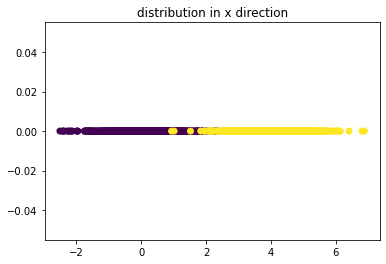

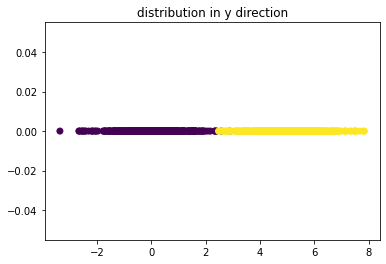

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


Text(0.5, 1.0, 'Data visualization')

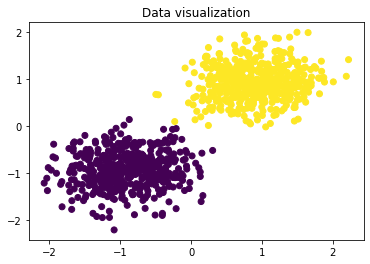

In [13]:
#Data normalization
def normalize_dataset(dataset):
    norm = [[np.mean([row[i] for row in dataset]), np.std([row[i] for row in dataset])] for i in range(len(dataset[0]))]
    for row in dataset:
        for i in range(len(row)): row[i] = (row[i] - norm[i][0]) / norm[i][1]            
    return dataset
data = normalize_dataset(data)
# perform data normalization here using mean substraction and std division
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

variance along pca1 direction= 1.8477663843459735
variance along pca2 direction= 0.15223361565402713


Text(0.5, 1.0, 'distribution in pca2 direction')

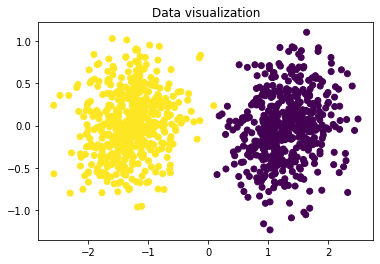

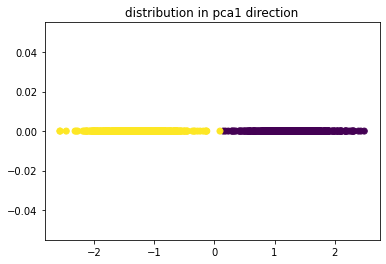

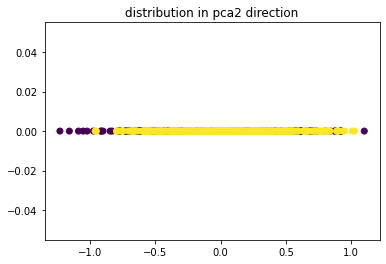

In [43]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=data.dot(u)# insert your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')

PCA 1 dimension is sufficient, we can droup PCA 2 dimension

In [46]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data=self.pre_process(data)
    cov=data.T @ data# insert your code here
    u,_,_=np.linalg.svd(cov) # singular value decomposition
    u_req=u[:,:self.retain_dim]# insert your code here
    trans_data = data.dot(u_req)# insert your code here
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    u,s,v=np.linalg.svd(cov)
     # insert your code here # can also take 90%
    var = 0.0
    t_var = np.sum(np.square(s))
    for i in range(s.shape[0]):
      var = np.sum(np.square(s[:i]))
      if (var >= 0.9*t_var):
        break
    return i
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

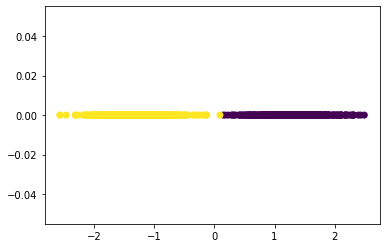

In [47]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [48]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)





KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


In [50]:
from google.colab import drive
drive.mount('/gdrive')
!pip install idx2numpy

Mounted at /gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=1d2d4edad6f16f80ecb2fd647a5769b320dec3189149f3f8ffee446146ace0c1
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(100, 784)
(100,)


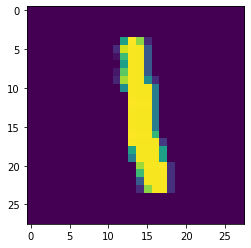

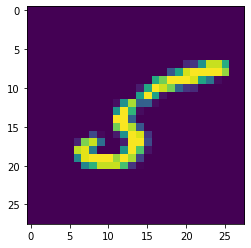

In [52]:
# MNIST data

import numpy as np
import matplotlib.pyplot as plt 

file1='/content/drive/MyDrive/prml/clustering/Copy of train-images.idx3-ubyte'
file2='/content/drive/MyDrive/prml/clustering/Copy of train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 10
KNN Training accuracy = 95.0
(50, 28, 28)
KNN Testing accuracy = 100.0


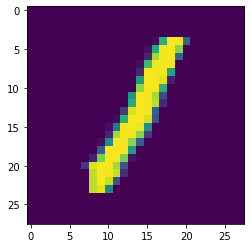

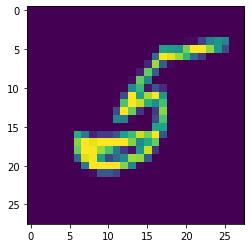

In [53]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


# Linear Discriminate Analysis (LDA)

Text(0.5, 1.0, 'distribution in y direction')

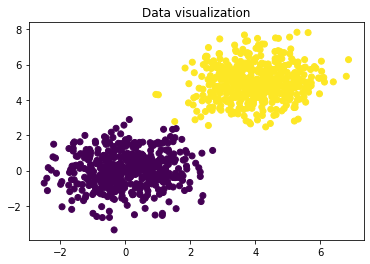

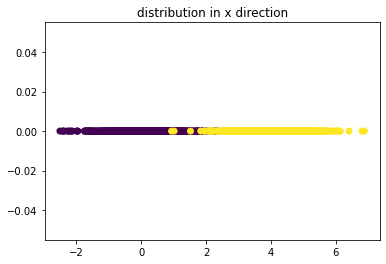

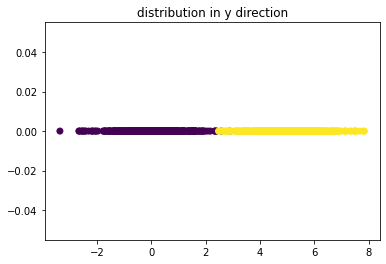

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [59]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))
  S_b=np.zeros((data.shape[1],data.shape[1]))

  mean_overall = np.mean(data, axis=0) 
  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]=(data_l[i] - mean_l[i]).T.dot((data_l[i] - mean_l[i]))# insert your code here
    S_w=S_w+cov_l[i]
    mean_diff = (mean_l[i] - mean_overall).reshape(data.shape[1], 1)


  S_w=S_w/len(data_l)

  if len(data_l)==2:
    S_b += (mean_diff).dot(mean_diff.T)
    u,_,_ = np.linalg.svd(np.linalg.pinv(S_w).dot(S_b))
    w = u[:,:len(data_l)-1]# insert your code here

  else:
    S_t=np.cov(data,rowvar=False)
    S_b = S_t - S_w
    u,_,_= np.linalg.svd(np.linalg.pinv(S_w).dot(S_b))
    w=u[:,:len(data_l)-1]

  return w




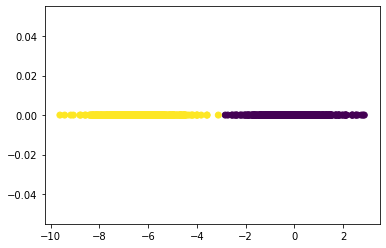

In [60]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)


In [63]:
w.shape,data.shape

((2, 1), (1000, 2))

In [65]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction


from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w[:]
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(data_tst@ w[:],tst_label)*100)



KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


## LDA multiclass 
1. 3 class Sythetic data
2. Homework: Mnist 3 class and 10 class



Text(0.5, 1.0, 'distribution in y direction')

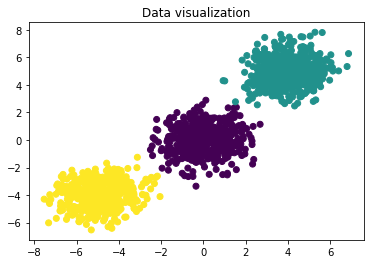

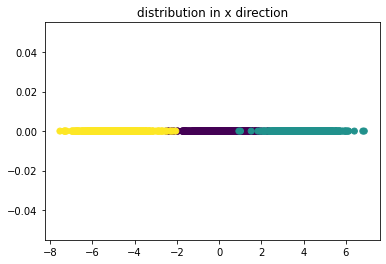

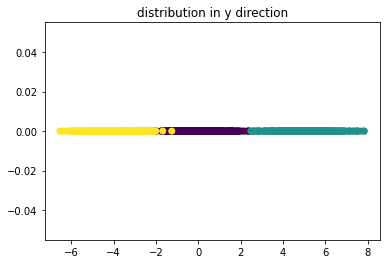

In [66]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


(2, 2)


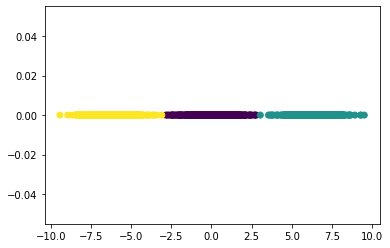

In [69]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,1],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [68]:
# testing (using KNN)

from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data3=np.random.multivariate_normal(mean3,var,50)
data_tst=np.concatenate((data1,data2,data3))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


(150, 784)
(150,)


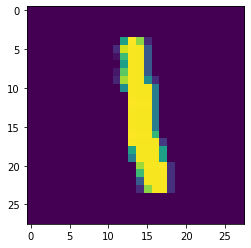

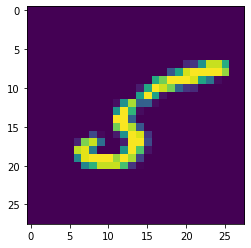

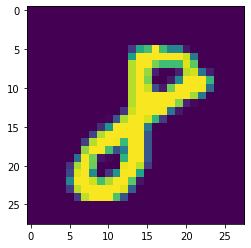

In [70]:
# MNIST data 3 Class LDA
cl = [1,5,8]

# for class 1
id_1 = np.where(labels==cl[0])
id1 = id_1[0]
id1 = id1[:50]
Im_1 = Images[id1,:,:]
lab_ = labels[id1]

# for class 5
id_5 = np.where(labels==cl[1])
id5 = id_5[0]
id5 = id5[:50]
Im_5 = Images[id5,:,:]
lab_5 = labels[id5]

# for class 7
id_8 = np.where(labels==cl[2])
id8 = id_8[0]
id8 = id8[:50]
Im_8= Images[id8,:,:]
lab_8 = labels[id8]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_8[1,:,:])

#print(Im_5.shape)
data = np.concatenate((Im_1,Im_5,Im_8))
data = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab = np.concatenate((lab_1,lab_5,lab_8))
print(G_lab.shape)

data = data.astype('float32')
data /= 255

In [72]:
w = LDA(data,G_lab)

trans_data = data @ w
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)

KNN Training accuracy = 100.0


In [75]:
cl = [1,5,8]

# for class 1
id_1 = np.where(labels==cl[0])
id1 = id_1[0]
id1 = id1[50:100]
Im_1 = Images[id1,:,:]
lab_ = labels[id1]

# for class 5
id_5 = np.where(labels==cl[1])
id5 = id_5[0]
id5 = id5[50:100]
Im_5 = Images[id5,:,:]
lab_5 = labels[id5]

# for class 7
id_8 = np.where(labels==cl[2])
id8 = id_8[0]
id8 = id8[50:100]
Im_8= Images[id8,:,:]
lab_8 = labels[id8]

data_tst = np.concatenate((Im_1,Im_5,Im_8))
data_tst = np.reshape(data,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))
tst_lab = np.concatenate((lab_1,lab_5,lab_8))

# final testing
print('KNN Testing accuracy =',knn.score(data_tst @ w,tst_lab)*100)


KNN Testing accuracy = 100.0


(8000, 784)
(8000,)


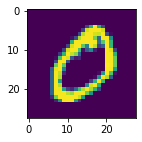

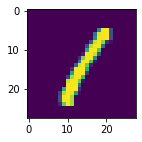

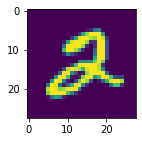

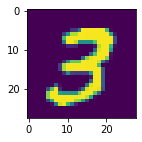

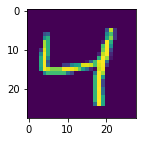

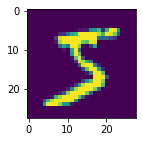

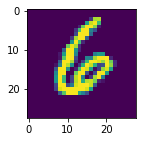

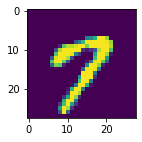

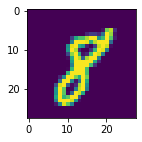

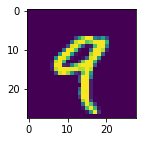

In [85]:
# MNIST data 10 Class LDA
cl = list(set(labels))
Im_a, lab_a = [], []

for i in range(len(cl)):
    a = np.where(labels==cl[i])[0][:800]
    Im_a.append([Images[a,:,:]])
    lab_a.append([labels[a]])

Im_a = np.asarray(Im_a)
lab_a = np.asarray(lab_a)

for i in range(len(cl)):
    plt.figure(figsize = (20,2))
    plt.imshow(Im_a[i,0,0,:,:])

data = np.concatenate((Im_a[0],Im_a[1],Im_a[2],Im_a[3],Im_a[4],Im_a[5],Im_a[6],Im_a[7],Im_a[8],Im_a[9]))
data = np.reshape(data,(data.shape[0]*data.shape[1],data.shape[2]*data.shape[3]))
print(data.shape)
G_lab = np.concatenate((lab_a[0],lab_a[1],lab_a[2],lab_a[3],lab_a[4],lab_a[5],lab_a[6],lab_a[7],lab_a[8],lab_a[9]))
G_lab = np.reshape(G_lab,(G_lab.shape[0]*G_lab.shape[1]))
print(G_lab.shape)

data = data.astype('float32')
data /= 255

In [87]:
w = LDA(data,G_lab)

trans_data = data @ w
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)

## testing
## data preparation
Im_a, lab_a = [], []

for i in range(len(cl)):
    a = np.where(labels==cl[i])[0][800:1000]
    Im_a.append([Images[a,:,:]])
    lab_a.append([labels[a]])

Im_a = np.asarray(Im_a)
lab_a = np.asarray(lab_a)

data_tst = np.concatenate((Im_a[0],Im_a[1],Im_a[2],Im_a[3],Im_a[4],Im_a[5],Im_a[6],Im_a[7],Im_a[8],Im_a[9]))
data_tst = np.reshape(data_tst,(data_tst.shape[0]*data_tst.shape[1],data_tst.shape[2]*data_tst.shape[3]))
tst_lab = np.concatenate((lab_a[0],lab_a[1],lab_a[2],lab_a[3],lab_a[4],lab_a[5],lab_a[6],lab_a[7],lab_a[8],lab_a[9]))
tst_lab = np.reshape(tst_lab,(tst_lab.shape[0]*tst_lab.shape[1]))

# final testing
print('KNN Testing accuracy =',knn.score(data_tst @ w,tst_lab)*100)

KNN Training accuracy = 91.4875
KNN Testing accuracy = 64.0
